In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Employment0809 Dataset Analysis
The table below shows the summary statistics of average weekly earnings for white male and black female workers.
We observe that white males have higher mean earnings compared to black females, and a wider spread in the data.

In [35]:
# 1. Explore dataset Employement0809 by loading the CSV file available on Blackboard using the read.csv() command into python
df = pd.read_csv('employment0809.csv')
df.head()

,age,female,race,earnwke,employed,unemployed,married,union,government,private,self
0,41,1,1,500.00,1,0,1,0,0,1,0
1,27,0,1,520.00,1,0,1,0,0,1,0
2,29,0,3,615.00,1,0,0,0,1,0,0
3,50,1,3,865.38,1,0,1,0,1,0,0
4,27,0,1,712.50,1,0,0,0,0,1,0


#### 1(a) Summary Statistics for White Male and Black Female Workers


In [36]:
# 1.(a) Calculate the summary statistics for the average weekly earnings (earnwke) variable for white male and black female workers )

white_male = df[(df['race'] == 1) & (df['female'] == 0)]
black_female = df[(df['race'] == 2) & (df['female'] == 1)]

# Summary statistics for earnwke for White Male and Black Female
print("White Male earnings summary:\n", white_male['earnwke'].describe())
print("Black Female earnings summary:\n", black_female['earnwke'].describe())

White Male earnings summary:
 count    1976.000000
mean     1035.103472
std       649.531906
min         0.000000
25%       560.000000
50%       884.610000
75%      1346.150000
max      2884.610000
Name: earnwke, dtype: float64
Black Female earnings summary:
 count     249.000000
mean      603.827229
std       364.691928
min         2.000000
25%       340.000000
50%       510.000000
75%       769.230000
max      2365.000000
Name: earnwke, dtype: float64


#### 1(b) Percentiles of Average Weekly Earnings


In [37]:
# 1(b) Percentiles
percentiles = [0.05, 0.25, 0.55, 0.85, 0.95]
print("Percentiles:\n", df['earnwke'].quantile(percentiles))

Percentiles:
 0.05     177.356
0.25     440.000
0.55     769.000
0.85    1400.000
0.95    2003.076
Name: earnwke, dtype: float64


#### 1(c) 85% Confidence Interval for Mean Age


In [39]:
# 1(c) 85% CI for mean age
age = df['age']
n = len(age)
mean_age = np.mean(age)
std_age = np.std(age, ddof=1)
alpha = 0.15  # 1 - 0.85 confidence
t_score = stats.t.ppf(1 - alpha/2, df=n-1)
margin_error = t_score * (std_age / np.sqrt(n))
ci_lower = mean_age - margin_error
ci_upper = mean_age + margin_error
print(f"85% Confidence Interval for Mean Age: ({ci_lower:.2f}, {ci_upper:.2f})")

85% Confidence Interval for Mean Age: (41.81, 42.30)


#### 1(d) Relationship Between Age and Average Weekly Earnings


In [40]:
# 1(d-ii) OLS Regression
X = df['age']
y = df['earnwke']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                earnwke   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     222.9
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           2.70e-49
Time:                        22:27:56   Log-Likelihood:                -37085.
No. Observations:                4773   AIC:                         7.417e+04
Df Residuals:                    4771   BIC:                         7.419e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        401.1962     31.083     12.907      0.0

##### Interpretation
The OLS model shows that for every 1 year increase in age, average weekly earnings increase by approximately 10.63 units.
The R-squared is 0.044, indicating that only 4.46% of variability in earnings is explained by age. 
The p-value < 0.05 shows the relationship is statistically significant at alpha = 0.05.


In [41]:
# 1(d-iii) R-squared / % variability
print("R-squared:", model.rsquared)
print("Percent variability explained:", model.rsquared*100)

R-squared: 0.04463357116406319
Percent variability explained: 4.4633571164063195


In [42]:
# 1(d-iv) Significance at alpha=0.05
p_value = model.pvalues['age']
print("p-value of age coefficient:", p_value)
if p_value < 0.05:
    print("Statistically significant at alpha = 0.05")
else:
    print("Not statistically significant at alpha = 0.05")

p-value of age coefficient: 2.69981483499833e-49
Statistically significant at alpha = 0.05


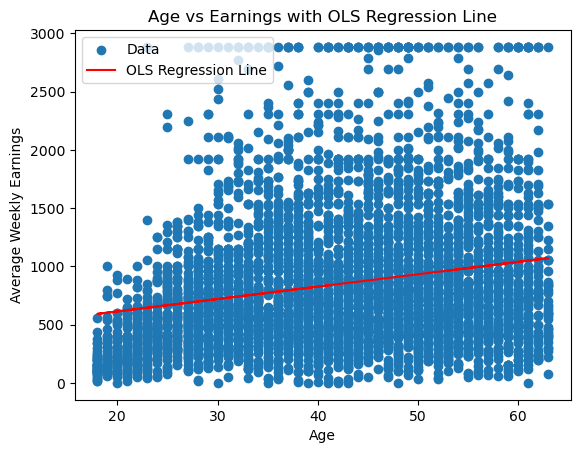

In [43]:
# 1(d-v) Scatter plot with regression line
plt.scatter(df['age'], df['earnwke'], label='Data')
plt.plot(df['age'], model.predict(X_const), color='red', label='OLS Regression Line')
plt.xlabel("Age")
plt.ylabel("Average Weekly Earnings")
plt.title("Age vs Earnings with OLS Regression Line")
plt.legend()
plt.show()

###### The scatter plot with the regression line shows a positive trend between age and average weekly earnings.
